<a href="https://colab.research.google.com/github/DJack47/DJack47.github.io/blob/main/Parasitoid-Host%20Relations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimization terminated successfully.
         Current function value: 2335198.912458
         Iterations: 228
         Function evaluations: 401
[5.18714640e-01 1.69384097e-02 9.58046141e-05 9.63555306e-02]


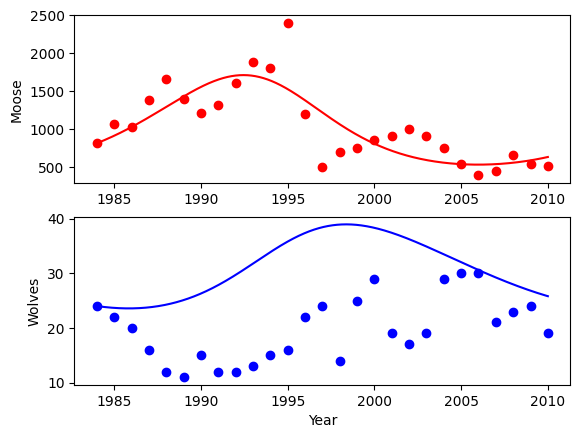

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.optimize
from scipy.integrate import odeint


## read data

year = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
moose = [811, 1062, 1025, 1380, 1653, 1397, 1216, 1313, 1600, 1880, 1800, 2400, 1200, 500, 700, 750, 850, 900, 1000, 900, 750, 540, 385, 450, 650, 530, 510]
wolf = [24, 22, 20, 16, 12, 11, 15, 12, 12, 13, 15, 16, 22, 24, 14, 25, 29, 19, 17, 19, 29, 30, 30, 21, 23, 24, 19]

f,(ax1,ax2) = plt.subplots(2)

line1 = ax1.scatter(year,moose, c="r")
line2 = ax2.scatter(year,wolf, c="b")

ax1.set_ylabel("Moose")
ax2.set_ylabel("Wolves")
ax2.set_xlabel("Time (Years)")
#
# plt.show()

def sim(variables, t, params):

    # moose population level
    x = variables[0]

    # wolf population level
    y = variables[1]


    alpha = params[0]
    beta = params[1]
    delta = params[2]
    gamma = params[3]

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y

    return([dxdt, dydt])

def loss_function(params, year,moose, wolf):

    y0 = [moose[0], wolf[0]]

    t = np.linspace(year[0], year[-1], num=len(year))

    output = odeint(sim, y0, t, args=(params,))

    loss = 0

    for i in range(len(year)):
        data_moose = moose[i]
        model_moose = output[i,0]

        data_wolf = wolf[i]
        model_wolf = output[i,1]

        res = (data_moose - model_moose)**2 + (data_wolf - model_wolf)**2

        loss += res

    return(loss)

params0 = np.array([1,0.01,0.1,0.06])
minimum = scipy.optimize.fmin(loss_function, params0, args=(year,moose, wolf))

print(minimum)

alpha_fit = minimum[0]
beta_fit = minimum[1]
delta_fit = minimum[2]
gamma_fit = minimum[3]

params = [alpha_fit, beta_fit, delta_fit, gamma_fit]

y0 = [moose[0], wolf[0]]


t = np.linspace(year[0], year[-1], num=1000)

output = odeint(sim, y0, t, args=(params,))



line1, = ax1.plot(t,output[:,0], color="r")
line2, = ax2.plot(t,output[:,1], color="b")

ax1.set_ylabel("Moose")
ax2.set_ylabel("Wolves")
ax2.set_xlabel("Year")

plt.show()

Optimized Parameters: [2.01837348e-01 9.22677365e-03 2.37580765e-04 2.41165738e-01
 6.30483276e+02 1.42536128e+01]


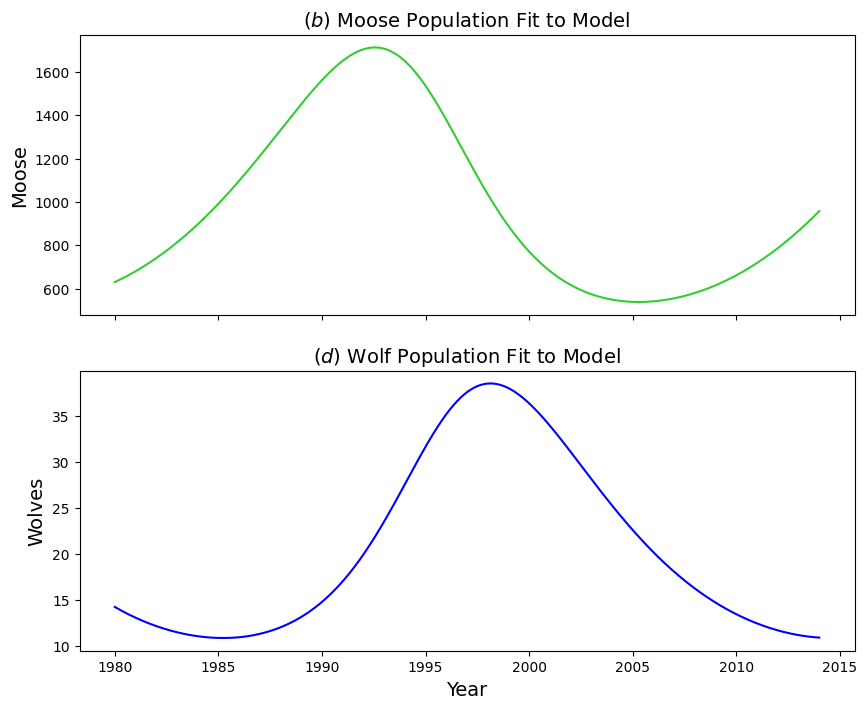

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
from scipy.integrate import odeint

# Read data
year = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
moose = [664, 650, 700, 900, 811, 1062, 1025, 1380, 1653, 1397, 1216, 1313, 1600, 1880, 1800, 2400, 1200, 500, 700, 750, 850, 900, 1000, 900, 750, 540, 385, 450, 650, 530, 510, 515, 750, 975, 1050]
wolf = [50, 30, 14, 23, 24, 22, 20, 16, 12, 11, 15, 12, 12, 13, 15, 16, 22, 24, 14, 25, 29, 19, 17, 19, 29, 30, 30, 21, 23, 24, 19, 16, 9, 8, 9]

# Define the simulation model
def sim(variables, t, params):
    x = variables[0]  # moose population level
    y = variables[1]  # wolf population level

    alpha, beta, delta, gamma = params

    dxdt = alpha * x - beta * x * y
    dydt = - gamma * y + delta * x * y

    return [dxdt, dydt]

# Define the loss function
def loss_function(params, year, moose, wolf):
    alpha, beta, delta, gamma, x0, y0 = params
    y0 = [x0, y0]
    t = np.linspace(year[0], year[-1], num=len(year))
    output = odeint(sim, y0, t, args=([alpha, beta, delta, gamma],))

    loss = 0
    for i in range(len(year)):
        data_moose = moose[i]
        model_moose = output[i, 0]
        data_wolf = wolf[i]
        model_wolf = output[i, 1]
        res = (data_moose - model_moose)**2 + (data_wolf - model_wolf)**2
        loss += res

    return loss

# Use a more sophisticated optimizer and include initial conditions
params0 = np.array([0.2, 0.003, 0.001, 0.5, 500, 32])
bounds = [(0, 10), (0, 1), (0, 1), (0, 1), (0, 3000), (0, 100)]
result = scipy.optimize.minimize(loss_function, params0, args=(year, moose, wolf), method='L-BFGS-B', bounds=bounds)
minimum = result.x

alpha_fit, beta_fit, delta_fit, gamma_fit, x0_fit, y0_fit = minimum
params = [alpha_fit, beta_fit, delta_fit, gamma_fit]

# Simulate with optimized parameters
y0 = [x0_fit, y0_fit]
t = np.linspace(year[0], year[-1], num=1000)
output = odeint(sim, y0, t, args=(params,))

# Plot results
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 8))
ax1.plot(t, output[:, 0], color="limegreen", label="Fitted Moose")
ax2.plot(t, output[:, 1], color="b", label="Fitted Wolves")
ax1.set_ylabel("Moose", fontsize=14)
ax2.set_ylabel("Wolves", fontsize=14)
ax2.set_xlabel("Year", fontsize=14)
ax1.set_title('($b$) Moose Population Fit to Model', fontsize=14)
ax2.set_title('($d$) Wolf Population Fit to Model', fontsize=14)

print("Optimized Parameters:", minimum)

In [ ]:
import sympy as sym

#Derivatives of multivariable function

a, y, K, B, c, N, P = sym.symbols('a y K B c N P')
f = a*N*(1-N/K)-y*N*P

#Differentiating partially w.r.t x
derivative_f = f.diff(P)
derivative_f

-N*y

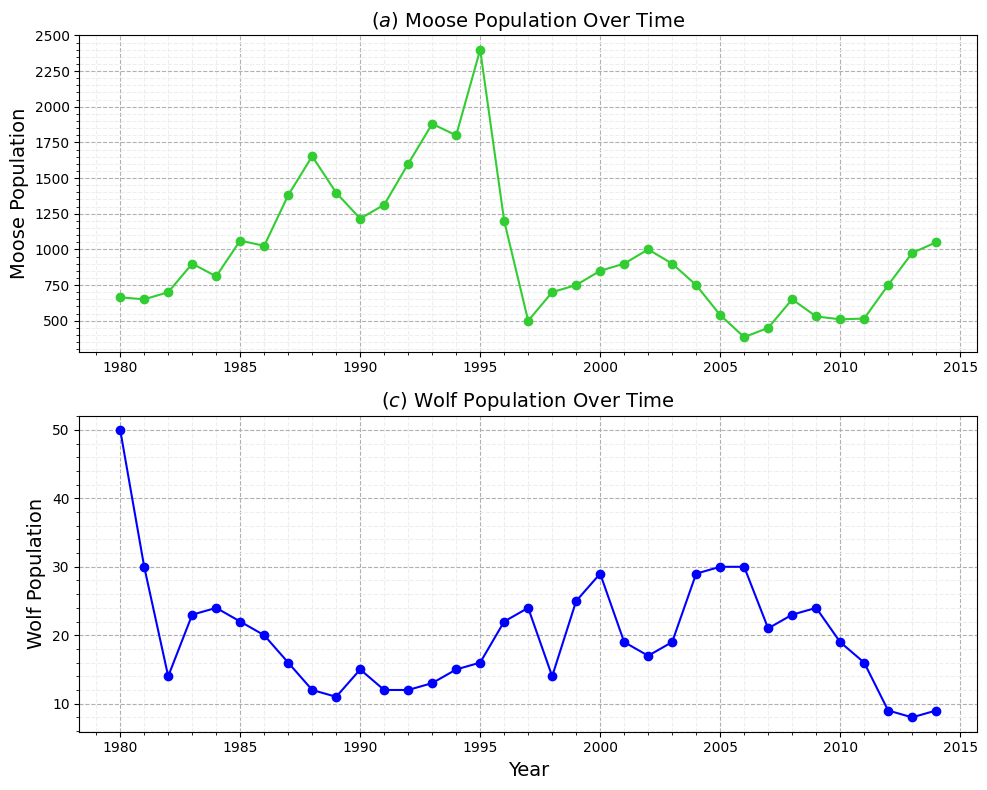

In [ ]:
import matplotlib.pyplot as plt

# Data
year = [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
moose = [664, 650, 700, 900, 811, 1062, 1025, 1380, 1653, 1397, 1216, 1313, 1600, 1880, 1800, 2400, 1200, 500, 700, 750, 850, 900, 1000, 900, 750, 540, 385, 450, 650, 530, 510, 515, 750, 975, 1050]
wolf = [50, 30, 14, 23, 24, 22, 20, 16, 12, 11, 15, 12, 12, 13, 15, 16, 22, 24, 14, 25, 29, 19, 17, 19, 29, 30, 30, 21, 23, 24, 19, 16, 9, 8, 9]

# Create figure and subplots
fig = plt.figure(figsize=(10, 8))

# First subplot for moose population
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(year, moose, marker='o', label='Moose Population', color = 'limegreen')
ax1.set_ylabel('Moose Population', fontsize=14)
ax1.set_title('($a$) Moose Population Over Time', fontsize=14)
ax1.grid(which = "major", linestyle='--')
ax1.grid(which = "minor", linestyle='--', color='#EEEEEE')
ax1.minorticks_on()

# Second subplot for wolf population
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(year, wolf, marker='o', label='Wolf Population', color = 'blue')
ax2.set_ylabel('Wolf Population', fontsize=14)
ax2.set_title('($c$) Wolf Population Over Time', fontsize=14)
ax2.set_xlabel('Year', fontsize=14)
ax2.grid(which = "major", linestyle='--')
ax2.grid(which = "minor", linestyle='--', color='#EEEEEE')
ax2.minorticks_on()

# Adjust layout and display plots
plt.tight_layout()
plt.show()

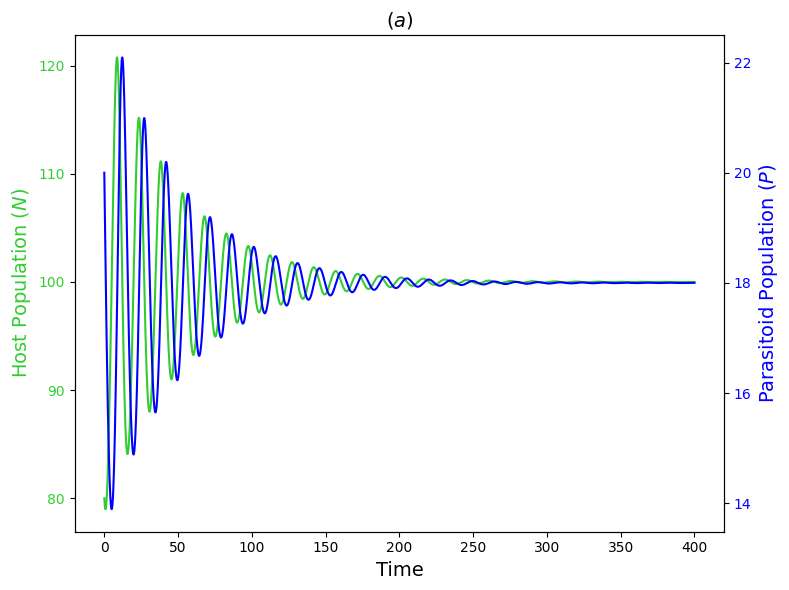

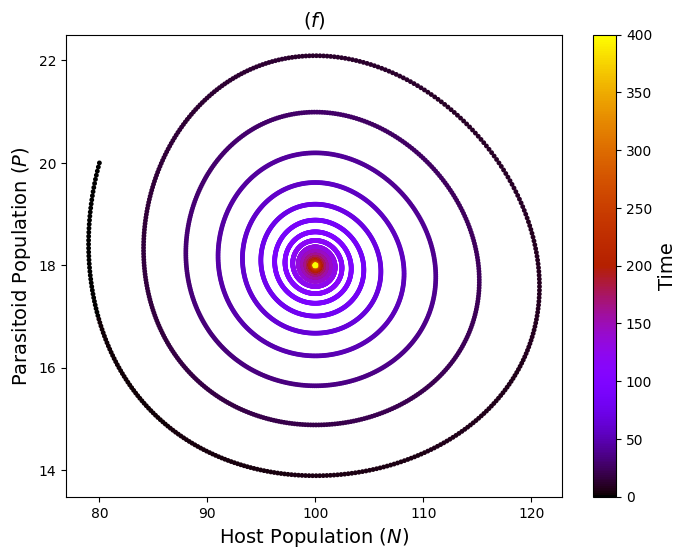

Highest host population: 120.8 at time 8.641
Lowest host population: 79 at time 0.8001
Highest parasitoid population: 22.09 at time 12.16
Lowest parasitoid population: 13.89 at time 5.001
Final host population: 99.9939
Final parasitoid population: 18.0011


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the model equations
def parasitoid_host_model(y, t, r, K, a, c, m):
    H, P = y
    dH_dt = r * H * (1 - H / K) - a * H * P
    dP_dt = c * a * H * P - m * P
    return [dH_dt, dP_dt]

# Parameters
r = 0.4    # Intrinsic growth rate of the host population | Increasing Increases parasitoid population
K = 1000   # Carrying capacity of the host population | Convergence remains largely similar
a = 0.02   # Search efficiency (attack rate) of the parasitoid | Increasing decreases the population levels for both
c = 0.25      # Conversion efficiency (number of parasitoid offspring per parasitized host) | Increasing decreases host population
m = 0.5   # Mortality rate of the parasitoid population | Increasing increases host population, decreases parasite population

# Initial conditions
H0 = 80    # Initial host population
P0 = 20    # Initial parasitoid population
y0 = [H0, P0]

# Time vector (in arbitrary units)
t = np.linspace(0, 400, 10000)

# Solve the differential equations
solution = odeint(parasitoid_host_model, y0, t, args=(r, K, a, c, m))
H = solution[:, 0]
P = solution[:, 1]

# Function to plot time series with dual y-axes
def plot_time_series(t, H, P):
    fig, ax1 = plt.subplots(figsize=(8, 6))

    plt.title('($a$)', fontsize=14)
    color1 = 'limegreen'
    ax1.set_xlabel('Time', fontsize=14)
    ax1.set_ylabel('Host Population ($N$)', color=color1, fontsize=14)
    ax1.plot(t, H, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color2 = 'blue'
    ax2.set_ylabel('Parasitoid Population ($P$)', color=color2, fontsize=14)
    ax2.plot(t, P, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    fig.tight_layout()  # to prevent the labels from overlapping
    plt.show()

# Function to plot phase portrait with gradient coloring
def plot_phase_portrait(H, P, t):
    plt.figure(figsize=(8, 6))
    plt.title('($f$)', fontsize=14)
    scatter = plt.scatter(H, P, c=t, cmap='gnuplot', lw=0, s=12)
    plt.colorbar().set_label('Time', fontsize=14)
    plt.xlabel('Host Population ($N$)', fontsize=14)
    plt.ylabel('Parasitoid Population ($P$)', fontsize=14)
    plt.show()

# Function to print highest and lowest population values and their time points
def print_extreme_populations(t, H, P):
    max_H = np.max(H)
    min_H = np.min(H)
    max_P = np.max(P)
    min_P = np.min(P)
    t_max_H = t[np.argmax(H)]
    t_min_H = t[np.argmin(H)]
    t_max_P = t[np.argmax(P)]
    t_min_P = t[np.argmin(P)]
    print(f"Highest host population: {max_H:.4g} at time {t_max_H:.4g}")
    print(f"Lowest host population: {min_H:.4g} at time {t_min_H:.4g}")
    print(f"Highest parasitoid population: {max_P:.4g} at time {t_max_P:.4g}")
    print(f"Lowest parasitoid population: {min_P:.4g} at time {t_min_P:.4g}")

# Function to print population values at the end of the time vector
def print_final_populations(H, P):
    print(f"Final host population: {H[-1]:.4f}")
    print(f"Final parasitoid population: {P[-1]:.4f}")

# Plot the results
plot_time_series(t, H, P)
plot_phase_portrait(H, P, t)
print_extreme_populations(t, H, P)
print_final_populations(H, P)


#Print the populations at each point
print("Time\tHost Population (N)\tParasitoid Population (P)")
for time, host_pop, parasitoid_pop in zip(t, H, P):
    print(f"{time:.2f}\t{host_pop:.2f}\t{parasitoid_pop:.2f}")

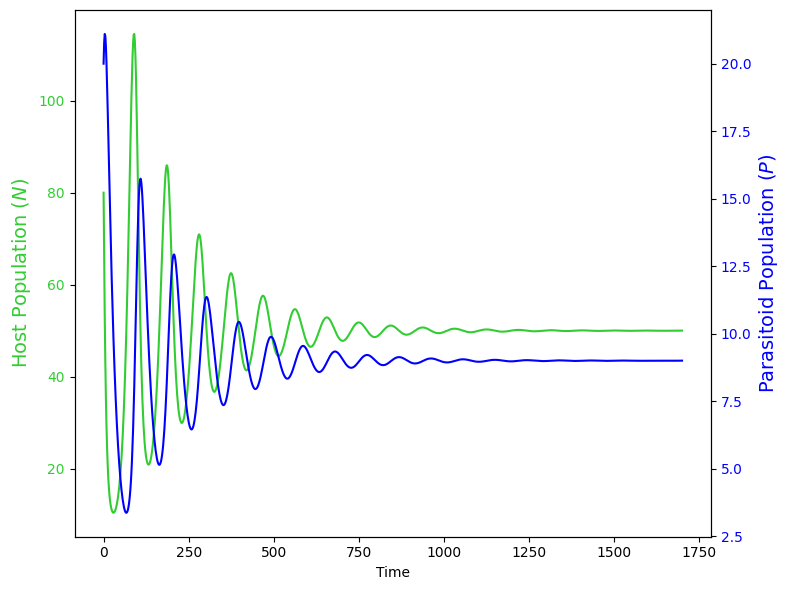

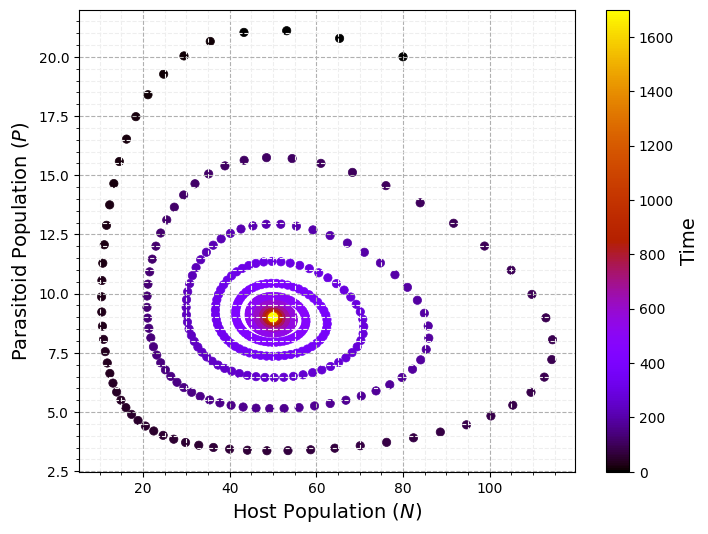

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the model equations with harvesting effect
def parasitoid_host_model(y, t, r, K, a, c, m, h):
    H, P = y
    dH_dt = r * H * (1 - H / K) - a * H * P - h * H
    dP_dt = c * a * H * P - m * P
    return [dH_dt, dP_dt]

# Parameters
r = 0.2    # Intrinsic growth rate of the host population | Increasing Increases parasitoid population
K = 1000   # Carrying capacity of the host population | Convergence remains largely similar
a = 0.01   # Search efficiency (attack rate) of the parasitoid | Increasing decreases the population levels for both
c = 0.1    # Conversion efficiency (number of parasitoid offspring per parasitized host) | Increasing decreases host population
m = 0.05  # Mortality rate of the parasitoid population
h = 0.1   # Harvesting rate of the host population

# Initial conditions
H0 = 80   # Initial host population
P0 = 20   # Initial parasitoid population
y0 = [H0, P0]

# Time vector (in arbitrary units)
t = np.linspace(0, 1700, 1000)

# Solve the differential equations
solution = odeint(parasitoid_host_model, y0, t, args=(r, K, a, c, m, h))
H = solution[:, 0]
P = solution[:, 1]

# Function to plot time series with dual y-axes
def plot_time_series(t, H, P):
    fig, ax1 = plt.subplots(figsize=(8, 6))

    color = 'limegreen'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Host Population ($N$)', color=color, fontsize=14)
    ax1.plot(t, H, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'blue'
    ax2.set_ylabel('Parasitoid Population ($P$)', color=color, fontsize=14)
    ax2.plot(t, P, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # to prevent the labels from overlapping
    plt.show()

# Function to plot phase portrait
def plot_phase_portrait(H, P, t):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(H, P, c=t, cmap='gnuplot', lw=0.5)
    plt.colorbar().set_label('Time', fontsize=14)
    plt.xlabel('Host Population ($N$)', fontsize=14)
    plt.ylabel('Parasitoid Population ($P$)', fontsize=14)
    plt.grid(which = "major", linestyle='--')
    plt.grid(which = "minor", linestyle='--', color='#EEEEEE')
    plt.minorticks_on()
    plt.show()

# Plot the results
plot_time_series(t, H, P)
plot_phase_portrait(H, P, t)

# Print the populations at each point
#print("Time\tHost Population (H)\tParasitoid Population (P)")
#for time, host_pop, parasitoid_pop in zip(t, H, P):
#    print(f"{time:.2f}\t{host_pop:.2f}\t{parasitoid_pop:.2f}")

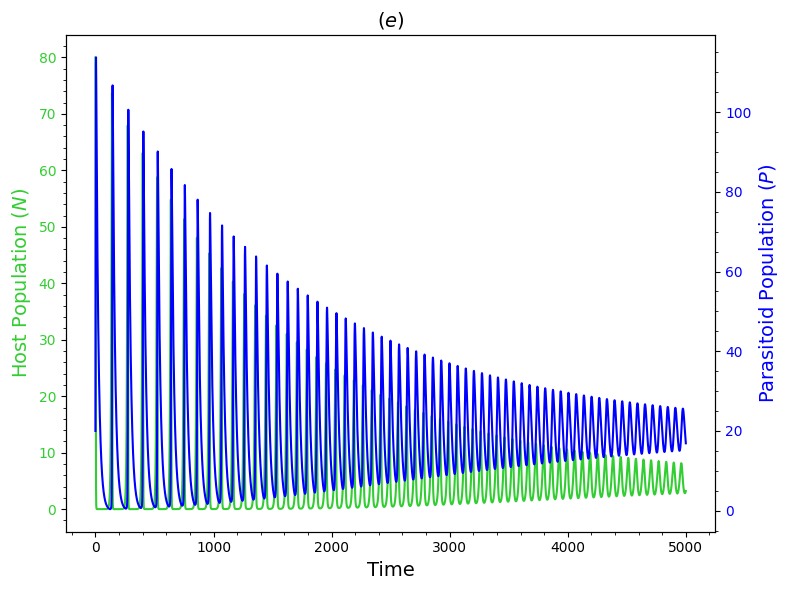

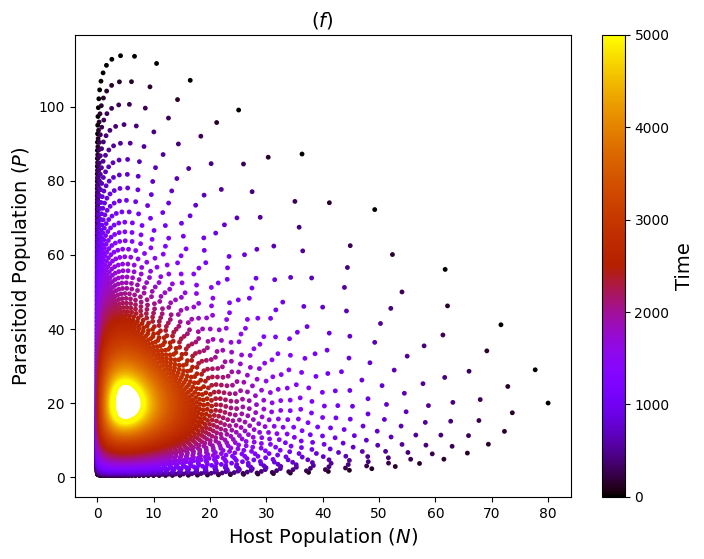

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model equations
def parasitoid_host_model(y, t, r, K, a, c, m):
    H, P = y
    dH_dt = r * H * (1 - H / K) - a * H * P
    dP_dt = c * a * H * P - m * P
    return np.array([dH_dt, dP_dt])

# Runge-Kutta 4th order method
def runge_kutta_4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    dt = t[1] - t[0]
    for i in range(1, n):
        k1 = dt * f(y[i-1], t[i-1], *args)
        k2 = dt * f(y[i-1] + k1/2, t[i-1] + dt/2, *args)
        k3 = dt * f(y[i-1] + k2/2, t[i-1] + dt/2, *args)
        k4 = dt * f(y[i-1] + k3, t[i-1] + dt, *args)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

# Parameters
r = 0.2    # Intrinsic growth rate of the host population
K = 1000   # Carrying capacity of the host population
a = 0.01   # Search efficiency (attack rate) of the parasitoid
c = 1    # Conversion efficiency (number of parasitoid offspring per parasitized host)
m = 0.05   # Mortality rate of the parasitoid population

# Initial conditions
H0 = 80   # Initial host population
P0 = 20  # Initial parasitoid population
y0 = [H0, P0]

# Time vector (in arbitrary units)
t = np.linspace(0, 5000, 10000)

# Solve the differential equations using Runge-Kutta 4th order method
solution = runge_kutta_4(parasitoid_host_model, y0, t, args=(r, K, a, c, m))
H = solution[:, 0]
P = solution[:, 1]

# Function to plot time series with dual y-axes
def plot_time_series(t, H, P):
    fig, ax1 = plt.subplots(figsize=(8, 6))

    plt.title('($e$)', fontsize=14)
    color1 = 'limegreen'
    ax1.set_xlabel('Time', fontsize=14)
    ax1.set_ylabel('Host Population ($N$)', color=color1, fontsize=14)
    ax1.plot(t, H, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color2 = 'blue'
    ax2.set_ylabel('Parasitoid Population ($P$)', color=color2, fontsize=14)
    ax2.plot(t, P, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    fig.tight_layout()  # to prevent the labels from overlapping
    ax1.minorticks_on()
    ax2.minorticks_on()
    plt.show()

# Function to plot phase portrait with gradient coloring
def plot_phase_portrait(H, P, t):
    plt.figure(figsize=(8, 6))
    plt.title('($f$)', fontsize=14)
    scatter = plt.scatter(H, P, c=t, cmap='gnuplot', lw=0, s=12)
    plt.colorbar().set_label('Time', fontsize=14)
    plt.xlabel('Host Population ($N$)', fontsize=14)
    plt.ylabel('Parasitoid Population ($P$)', fontsize=14)
    plt.show()

# Plot the results
plot_time_series(t, H, P)
plot_phase_portrait(H, P, t)

# Print the populations at each point
#print("Time\tHost Population (N)\tParasitoid Population (P)")
#for time, host_pop, parasitoid_pop in zip(t, H, P):
#    print(f"{time:.2f}\t{host_pop:.2f}\t{parasitoid_pop:.2f}")

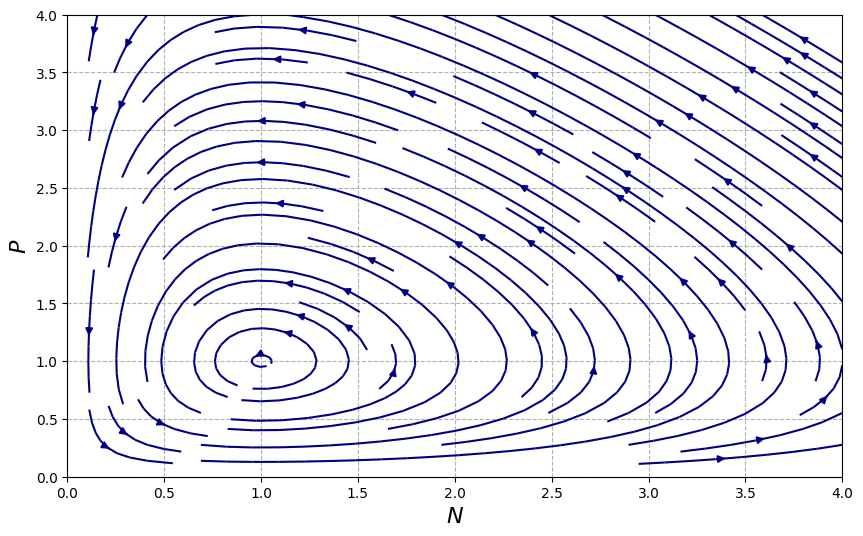

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 1
beta = 1
gamma = 1
delta = 1

# Define the system of differential equations
def predator_prey(X, Y):
    dX = alpha * X - beta * X * Y
    dY = delta * X * Y - gamma * Y
    return dX, dY

# Grid of points
x = np.linspace(0, 4, 40)
y = np.linspace(0, 4, 40)
X, Y = np.meshgrid(x, y)

# Compute the derivatives at each point
dX, dY = predator_prey(X, Y)

# Mask zero values
mask = (dX != 0) & (dY != 0)
dX = np.where(mask, dX, np.nan)
dY = np.where(mask, dY, np.nan)

# Create the streamplot
plt.figure(figsize=(10, 6))
plt.streamplot(X, Y, dX, dY, color='black')
plt.xlabel('$N$', fontsize=16)
plt.ylabel('$P$', fontsize=16)
plt.grid(which = "major", linestyle='--')
plt.grid(which = "minor", linestyle='--', color='#EEEEEE')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

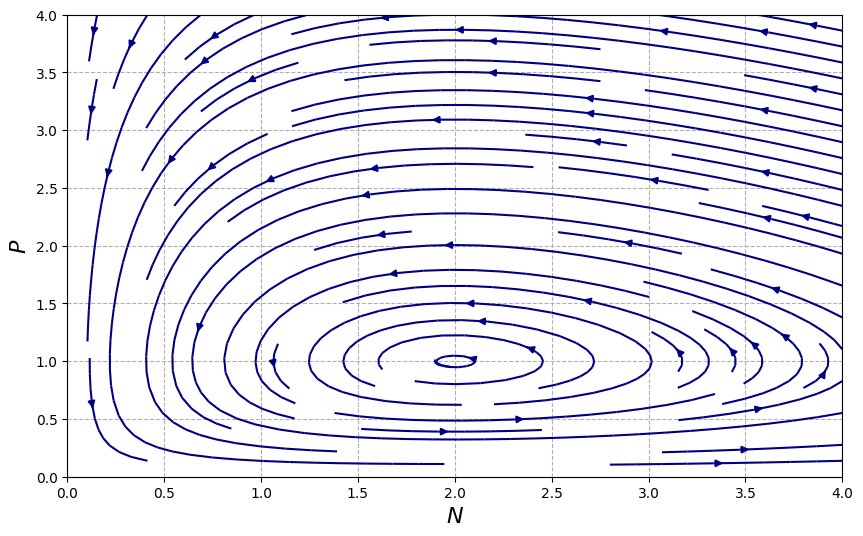

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 0.5
K = 1000
a = 0.5
c = 0.5
m = 0.5

# Define the system of differential equations
def parasitoid_host_model(H, P):
    dH_dt = r * H * (1 - H / K) - a * H * P
    dP_dt = c * a * H * P - m * P
    return dH_dt, dP_dt

# Grid of points
h = np.linspace(0, 4, 40)
p = np.linspace(0, 4, 40)
H, P = np.meshgrid(h, p)

# Compute the derivatives at each point
dH, dP = parasitoid_host_model(H, P)

# Mask zero values
mask = (dH != 0) & (dP != 0)
dH = np.where(mask, dH, np.nan)
dP = np.where(mask, dP, np.nan)

# Create the streamplot
plt.figure(figsize=(10, 6))
plt.streamplot(H, P, dH, dP, color='navy')
plt.xlabel('$N$', fontsize=16)
plt.ylabel('$P$', fontsize=16)
plt.grid(which="major", linestyle='--')
plt.grid(which="minor", linestyle='--', color='#EEEEEE')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()


steady state at (0, 0): eigenvalues = [ 5. -5.]
steady state at (1000, 0): eigenvalues = [-5.0000e+00  2.4995e+04]
steady state at (5.0, -4999.0): eigenvalues = [ 2.51249005e+04 -4.95050717e+00]


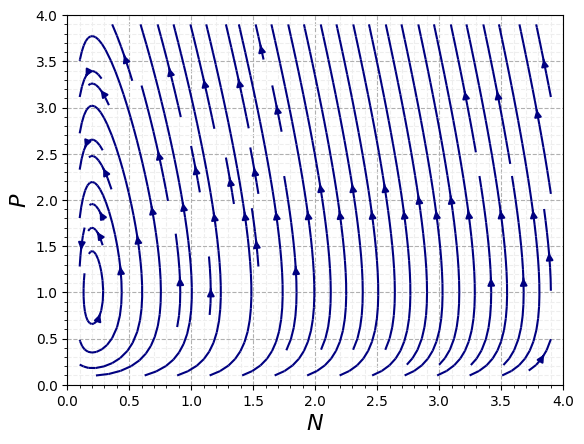

In [ ]:
import numpy as np
import scipy.integrate as intgr
import matplotlib.pyplot as plt

a = c = y = B = 5    # simple values just for illustration
K = 1000

def mat(N, P):    # calculate Jacobian matrix
    M = np.array([[a*(1-(2*N/K))-y*P, -y*N],
                  [c*y*P, c*y*N-B]])
    return M

N0, P0 = 0, 0
N1, P1 = K, 0
N2, P2 = B/c*y, (a/y)*(1-(B/c*y*K))

for (X,Y) in [(N0,P0), (N1,P1), (N2,P2)]:
    w, v = np.linalg.eig(mat(X,Y))    # this function calculates all eigenvalues and eigenvectors
    print(f'steady state at {(X, Y)}: eigenvalues = {w}')

x_points = np.arange(0.1, 4., 0.2)    # grid lines for x-axis
y_points = np.arange(0.1, 4., 0.2)    # grid lines for y-axis
x_grid, y_grid = np.meshgrid(x_points, y_points)    # generate a grid of x, y values

x_flow = x_grid * (a - (a*x_grid)/K - y*y_grid)
y_flow = y_grid * (c*y*x_grid - B)

plt.figure()
plt.streamplot(x_grid, y_grid, x_flow, y_flow, color = 'navy')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xlabel(r'$N$', fontsize = 16)
plt.ylabel(r'$P$', fontsize = 16)
plt.grid(which = "major", linestyle='--')
plt.grid(which = "minor", linestyle='--', color='#EEEEEE')
plt.minorticks_on()
plt.show()

In [ ]:
!pip install ddeint

  Preparing metadata (setup.py) ... done
  Created wheel for ddeint: filename=ddeint-0.2-py3-none-any.whl size=3953 sha256=65d269e9910a572e37669772a433b7ba11c60172b6117e5dc338999bb8c5bae7
  Stored in directory: /root/.cache/pip/wheels/dc/53/af/307886db6b88166a10bb2412b0fcc75e986ae56df1c6ad8c08
Successfully built ddeint


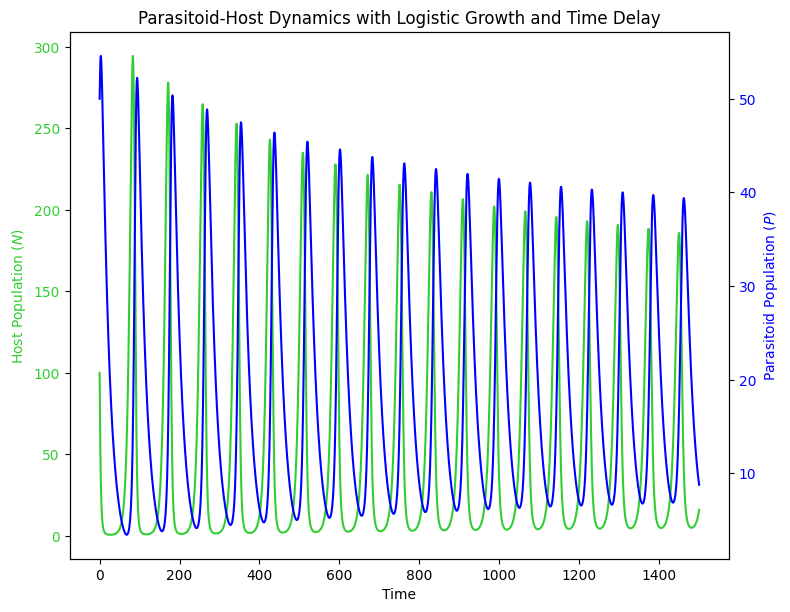

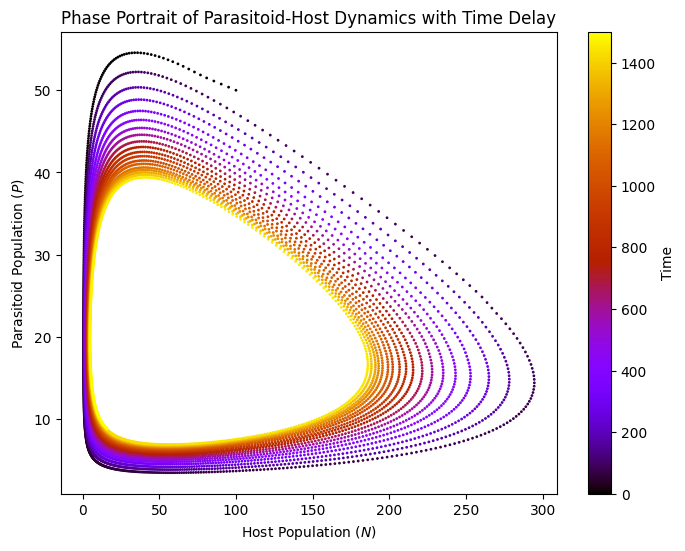

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint

# Define the model equations
def parasitoid_host_model(Y, t, r, K, a, c, m, tau):
    H, P = Y(t)
    H_tau, P_tau = Y(t - tau)
    dH_dt = r * H * (1 - H / K) - a * H * P
    dP_dt = c * a * H_tau * P_tau - m * P
    return np.array([dH_dt, dP_dt])

# Initial conditions and history function
def history(t):
    return np.array([100, 50])  # Initial host and parasitoid populations

# Parameters
r = 0.2    # Intrinsic growth rate of the host population
K = 1000   # Carrying capacity of the host population
a = 0.01   # Search efficiency (attack rate) of the parasitoid
c = 0.1    # Conversion efficiency (number of parasitoid offspring per parasitized host)
m = 0.05   # Mortality rate of the parasitoid population
tau = 1    # Time delay (in arbitrary units)

# Time vector (in arbitrary units)
t = np.linspace(0, 1500, 10000)

# Solve the differential equations
solution = ddeint(parasitoid_host_model, history, t, fargs=(r, K, a, c, m, tau))
H = solution[:, 0]
P = solution[:, 1]

# Function to plot time series with dual y-axes
def plot_time_series(t, H, P):
    fig, ax1 = plt.subplots(figsize=(8, 6))

    color = 'limegreen'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Host Population ($N$)', color=color)
    ax1.plot(t, H, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'blue'
    ax2.set_ylabel('Parasitoid Population ($P$)', color=color)
    ax2.plot(t, P, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # to prevent the labels from overlapping
    plt.title('Parasitoid-Host Dynamics with Logistic Growth and Time Delay')
    plt.show()

# Function to plot phase portrait as a colormap
def plot_phase_portrait_colormap(H, P, t):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(H, P, c=t, cmap='gnuplot', s=1)
    plt.xlabel('Host Population ($N$)')
    plt.ylabel('Parasitoid Population ($P$)')
    plt.title('Phase Portrait of Parasitoid-Host Dynamics with Time Delay')
    cbar = plt.colorbar(scatter)
    cbar.set_label('Time')
    plt.show()

# Plot the results
plot_time_series(t, H, P)
plot_phase_portrait_colormap(H, P, t)

# Print the populations at each point
#print("Time\tHost Population (H)\tParasitoid Population (P)")
#for time, host_pop, parasitoid_pop in zip(t, H, P):
#    print(f"{time:.2f}\t{host_pop:.2f}\t{parasitoid_pop:.2f}")

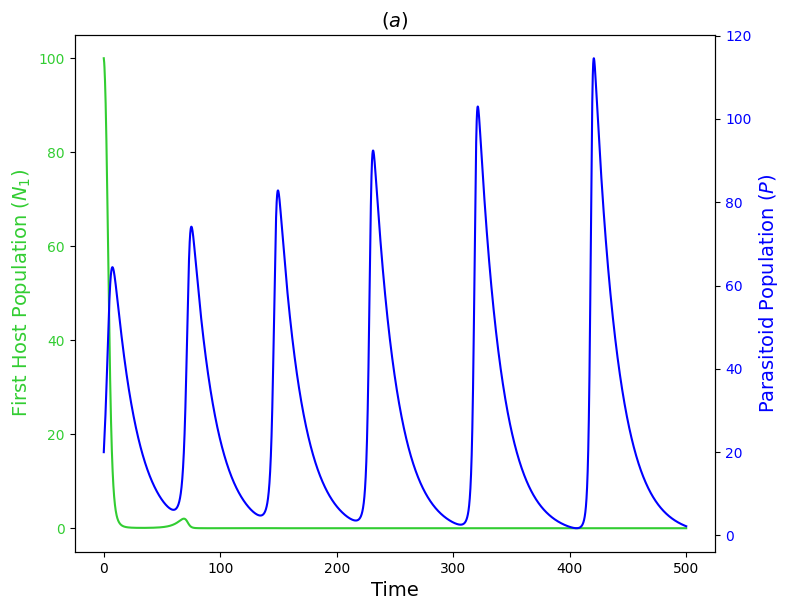

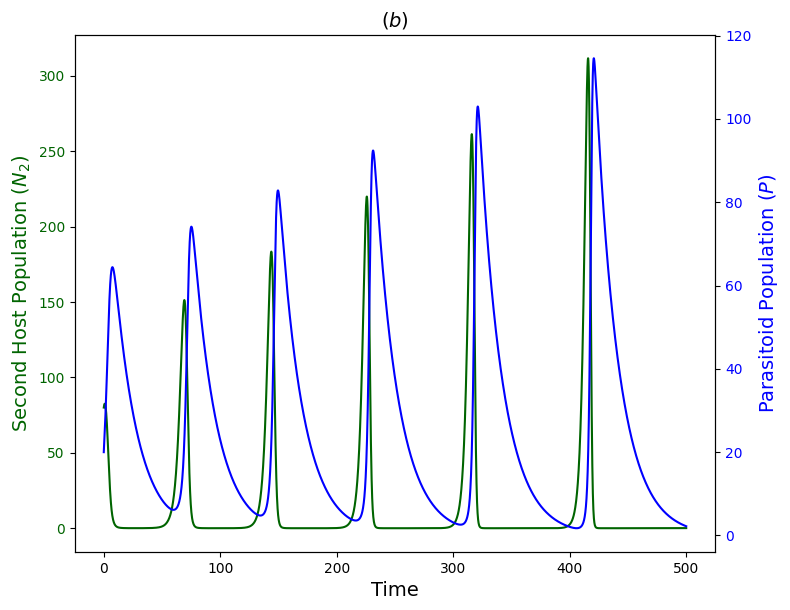

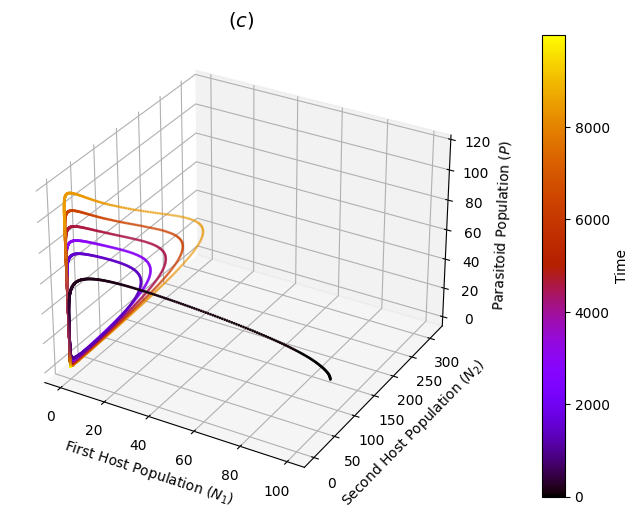

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint
from mpl_toolkits.mplot3d import Axes3D

# Parameters
r1 = 0.2
r2 = 0.4
K1 = 1000
K2 = 1000
a1 = 0.01
a2 = 0.015
c1 = 0.1
c2 = 0.2
m = 0.05
tau1 = 0.5
tau2 = 0.6

# Define the system of DDEs
def model(Y, t):
    H1, H2, P = Y(t)
    H1_tau1, H2_tau2, P_tau1, P_tau2 = Y(t - tau1)[0], Y(t - tau2)[1], Y(t - tau1)[2], Y(t - tau2)[2]

    dH1_dt = r1 * H1 * (1 - H1 / K1) - a1 * H1 * P
    dH2_dt = r2 * H2 * (1 - H2 / K2) - a2 * H2 * P
    dP_dt = c1 * a1 * H1_tau1 * P_tau1 + c2 * a2 * H2_tau2 * P_tau2 - m * P

    return np.array([dH1_dt, dH2_dt, dP_dt])

# Initial conditions
H1_0 = 100
H2_0 = 80
P_0 = 20

g = lambda t: np.array([H1_0, H2_0, P_0])

# Time points where the solution is computed
t = np.linspace(0, 500, 10000)

# Solve the system of DDEs
Y = ddeint(model, g, t)

# Plot results
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Host 1 and Parasitoid on dual y-axes
color = 'limegreen'
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('First Host Population ($N_1$)', color=color, fontsize=14)
ax1.plot(t, Y[:, 0], color=color, label='First Host Population ($N_1$)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
color = 'blue'
ax2.set_ylabel('Parasitoid Population ($P$)', color=color, fontsize=14)
ax2.plot(t, Y[:, 2], color=color, label='Parasitoid (P)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('$(a)$', fontsize=14)
plt.show()

# Plot results
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Host 2 and Parasitoid on dual y-axes
color = 'darkgreen'
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Second Host Population ($N_2$)', color=color, fontsize=14)
ax1.plot(t, Y[:, 1], color=color, label='Second Host Population ($N_2$)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second y-axis sharing the same x-axis
color = 'blue'
ax2.set_ylabel('Parasitoid Population ($P$)', color=color, fontsize=14)
ax2.plot(t, Y[:, 2], color=color, label='Parasitoid Population ($P$)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('$(b)$', fontsize=14)
plt.show()

# Function to plot the 3D phase portrait with colormap
def plot_3d_phase_portrait(Y):
    fig = plt.figure(figsize=(18, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create a colormap
    norm = plt.Normalize()
    colors = plt.cm.viridis(norm(np.arange(len(Y))))

    # Plot the 3D phase portrait with colormap
    sc = ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=np.arange(len(Y)), cmap='gnuplot', s=1)

    ax.set_xlabel('First Host Population ($N_1$)')
    ax.set_ylabel('Second Host Population ($N_2$)')
    ax.set_zlabel('Parasitoid Population ($P$)')
    ax.set_title('$(c)$', fontsize=14)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.grid(which="major", color='#EEEEEE')

    plt.colorbar(sc, ax=ax, label='Time')
    plt.show()

# Plot the 3D phase portrait
plot_3d_phase_portrait(Y)

In [ ]:
import numpy as np
import sympy as sp
from scipy.optimize import fsolve
from scipy.linalg import eigvals
from sympy import I

# Parameters
r1, r2 = 0.2, 0.4  # Growth rates
K1, K2 = 1000, 1000  # Carrying capacities
a1, a2 = 0.01, 0.015  # Attack rates
c1, c2 = 0.1, 0.2  # Conversion rates
m = 0.05  # Mortality rate of parasitoid
tau1, tau2 = 0.1, 0.2  # Time delays

# Define symbolic variables
H1, H2, P, lambda_ = sp.symbols('H1 H2 P lambda_')

# Define the system of equations
dH1_dt = r1 * H1 * (1 - H1 / K1) - a1 * H1 * P
dH2_dt = r2 * H2 * (1 - H2 / K2) - a2 * H2 * P
dP_dt = c1 * a1 * H1 * P + c2 * a2 * H2 * P - m * P

# Equilibrium points (solve for dH1_dt = 0, dH2_dt = 0, dP_dt = 0)
equilibria = sp.solve([dH1_dt, dH2_dt, dP_dt], (H1, H2, P))

# Display equilibrium points
print("Equilibrium Points:")
for eq in equilibria:
    print(f'H1_eq = {eq[0]}, H2_eq = {eq[1]}, P_eq = {eq[2]}')

# Jacobian matrix
J = sp.Matrix([[sp.diff(dH1_dt, var) for var in (H1, H2, P)],
               [sp.diff(dH2_dt, var) for var in (H1, H2, P)],
               [sp.diff(dP_dt, var) for var in (H1, H2, P)]])

# Function to compute characteristic equation numerically
def characteristic_eq(lambda_, J_eq, H1_eq, H2_eq, P_eq, tau1, tau2):
    A = np.array(J_eq).astype(np.float64)
    B = np.array([[0, 0, -a1 * H1_eq],
                  [0, 0, -a2 * H2_eq],
                  [c1 * a1 * P_eq, c2 * a2 * P_eq, -m]]).astype(np.float64)
    exp_term = np.exp(-lambda_ * tau1)
    return np.linalg.det(lambda_ * np.eye(3) - A - B * exp_term)

# Function to find roots of the characteristic equation
def find_roots(J_eq, H1_eq, H2_eq, P_eq, tau1, tau2, initial_guesses):
    roots = []
    for guess in initial_guesses:
        root = fsolve(characteristic_eq, guess, args=(J_eq, H1_eq, H2_eq, P_eq, tau1, tau2))
        roots.append(root[0])
    return np.array(roots)

# Analyze stability
initial_guesses = np.linspace(-2, 2, 10)  # Initial guesses for root finding
for eq in equilibria:
    H1_eq, H2_eq, P_eq = eq
    if all(sp.re(val) >= 0 for val in eq):
        J_eq = np.array(J.subs({H1: H1_eq, H2: H2_eq, P: P_eq})).astype(np.float64)

        # Find roots of the characteristic equation
        eigenvalues = find_roots(J_eq, H1_eq, H2_eq, P_eq, tau1, tau2, initial_guesses)

        # Display Jacobian and eigenvalues
        print(f'\nJacobian at Equilibrium Point (H1_eq={H1_eq}, H2_eq={H2_eq}, P_eq={P_eq}):')
        print(J_eq)
        print('Eigenvalues:')
        print(eigenvalues)

        # Determine stability
        if all(np.real(eigenvalues) < 0):
            print('The system is stable at this equilibrium point.')
        else:
            print('The system is not stable at this equilibrium point.')

Equilibrium Points:
H1_eq = -215.384615384615, H2_eq = 88.4615384615385, P_eq = 24.3076923076923
H1_eq = 0.0, H2_eq = 0.0, P_eq = 0.0
H1_eq = 0.0, H2_eq = 16.6666666666667, P_eq = 26.2222222222222
H1_eq = 0.0, H2_eq = 1000.00000000000, P_eq = 0.0
H1_eq = 50.0000000000000, H2_eq = 0.0, P_eq = 19.0000000000000
H1_eq = 1000.00000000000, H2_eq = 0.0, P_eq = 0.0
H1_eq = 1000.00000000000, H2_eq = 1000.00000000000, P_eq = 0.0

Jacobian at Equilibrium Point (H1_eq=0.0, H2_eq=0.0, P_eq=0.0):
[[ 0.2   0.    0.  ]
 [ 0.    0.4   0.  ]
 [ 0.    0.   -0.05]]
Eigenvalues:
[-0.10050506 -0.10050506 -0.10050506 -0.10050506 -0.10050506  0.2
  0.4         0.4         0.4         0.4       ]
The system is not stable at this equilibrium point.

Jacobian at Equilibrium Point (H1_eq=0.0, H2_eq=16.6666666666667, P_eq=26.2222222222222):
[[-0.06222222  0.          0.        ]
 [ 0.         -0.00666667 -0.25      ]
 [ 0.02622222  0.07866667  0.        ]]
Eigenvalues:
[-0.06222222 -0.06222222 -0.06222222 -0.06222

In [ ]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize_scalar

# Parameters
r1, r2 = 0.2, 0.4  # Growth rates
K1, K2 = 1000, 1000  # Carrying capacities
a1, a2 = 0.01, 0.015  # Attack rates
c1, c2 = 0.1, 0.2  # Conversion rates
m = 0.05  # Mortality rate of parasitoid

# Define symbolic variables
H1, H2, P, lambda_, tau = sp.symbols('H1 H2 P lambda_ tau')

# Define the system of equations
dH1_dt = r1 * H1 * (1 - H1 / K1) - a1 * H1 * P
dH2_dt = r2 * H2 * (1 - H2 / K2) - a2 * H2 * P
dP_dt = c1 * a1 * H1 * P + c2 * a2 * H2 * P - m * P

# Equilibrium points (solve for dH1_dt = 0, dH2_dt = 0, dP_dt = 0)
equilibria = sp.solve([dH1_dt, dH2_dt, dP_dt], (H1, H2, P))

# Jacobian matrix
J = sp.Matrix([[sp.diff(dH1_dt, var) for var in (H1, H2, P)],
               [sp.diff(dH2_dt, var) for var in (H1, H2, P)],
               [sp.diff(dP_dt, var) for var in (H1, H2, P)]])

# Function to compute the maximum real part of eigenvalues
def max_real_part_of_eigenvalues(tau, J_eq, H1_eq, H2_eq, P_eq):
    A = np.array(J_eq).astype(np.float64)
    B = np.array([[0, 0, -a1 * H1_eq],
                  [0, 0, -a2 * H2_eq],
                  [c1 * a1 * P_eq, c2 * a2 * P_eq, -m]]).astype(np.float64)
    def char_eq(lambda_):
        exp_term = np.exp(-lambda_ * tau)
        matrix = lambda_ * np.eye(3) - A - B * exp_term
        return np.linalg.det(matrix)

    def objective(tau):
        def find_max_real_part(guess):
            eigenvalues = np.roots([1, -1, 0, -char_eq(guess)])  # Adjust as necessary
            return max(np.real(eigenvalues))

        return find_max_real_part(0)

    return objective(tau)

# Find critical delay value
def find_critical_delay():
    critical_delays = []
    for eq in equilibria:
        H1_eq, H2_eq, P_eq = eq
        if all(sp.re(val) >= 0 for val in eq):
            J_eq = np.array(J.subs({H1: H1_eq, H2: H2_eq, P: P_eq})).astype(np.float64)

            result = minimize_scalar(lambda tau: max_real_part_of_eigenvalues(tau, J_eq, H1_eq, H2_eq, P_eq))
            critical_delay = result.x
            critical_delays.append(critical_delay)
            print(f'Critical Delay for Equilibrium Point (H1_eq={H1_eq}, H2_eq={H2_eq}, P_eq={P_eq}): {critical_delay}')

    return critical_delays

# Run the computation
find_critical_delay()

Critical Delay for Equilibrium Point (H1_eq=0.0, H2_eq=0.0, P_eq=0.0): 0.0
Critical Delay for Equilibrium Point (H1_eq=0.0, H2_eq=16.6666666666667, P_eq=26.2222222222222): 0.0
Critical Delay for Equilibrium Point (H1_eq=0.0, H2_eq=1000.00000000000, P_eq=0.0): 0.0
Critical Delay for Equilibrium Point (H1_eq=50.0000000000000, H2_eq=0.0, P_eq=19.0000000000000): 0.0
Critical Delay for Equilibrium Point (H1_eq=1000.00000000000, H2_eq=0.0, P_eq=0.0): 0.0
Critical Delay for Equilibrium Point (H1_eq=1000.00000000000, H2_eq=1000.00000000000, P_eq=0.0): 0.0


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]